__This Jupyter Notebook is an entry to Technical Assignment (Data Science) for Apigate, January 2020.__

Author: Ahmad Lokman Anuar

__Introduction__

This subject of this analysis is the airplane crash data from the year 1908 to 2008. Source of data is a public dataset, as provided in the assignment available at https://www.kaggle.com/saurograndi/airplane-crashes-since-1908. 

__Question 1__

Justify whether it is safer to take the aircraft nowadays. Support your decision with data.


__Approach__

General work flow: 

0. Manual review of the data.
1. Environment setup, load dataset.
2. Clean-up to organize data.
3. Descriptive Analysis to summarize data.
3. Plot graphs and Data Visualization.
4. Making interpretation from the outcome.


0. __Manual Review__

Visual inspection is important to get overview of dataset, to relate and understand context of the problem. During inspection, unfavorable datatypes that potentially skew downstream works can be easily detected and removed right away. (eg: introductory long header paragraph in CSV)

Upon review,the dataset consists of observations in rows and variables in colums which corresponds to every airplanes crashes case in the record:

    Date - The date of flight crash.
    Time - The time of flight crash.
    Location - Location of the crash.
    Operator - Name of flight operator company.
    Flight - Flight Number of the crashed airplane.
    Route - The Route of the flight.
    Type - The type of flight vessel.
    Registration - Description unavailable. 
    cn.In - Description unavailable.
    Aboard - The number of passenger on board
    Fatalities - The number of deaths
    Ground - Description unavailable.
    Summary - Summary of Incident.



A general understanding of the problem is formed based on visual inspection of dataset (attributes and values). Three attributes ('Registration','cn.In', and 'Ground' cannot be described accordingly.

1. __Load and view dataset__

Import downloaded dataset by entering its directory/path in local machine.

Load libraries required:

In [1]:
library(readr)    # to import and read flat/tabulated format
library(stringr)  # to use regx and other string functions
library(tidyverse)  # to manipulate data
library(dplyr)      # to manipulate data
library(ggplot2)    # to plot graph
library(lubridate)  # to manipulate as date
library(tm)         # to perform text mining operations
library(caret)      # to split data and and select featured data
library(wordcloud)  # to write text mining in cloud form
library(gridExtra)  # to arrange multiple grid based plots on a page
library(RColorBrewer)# to have nicer color palettes
library(tibble)
library(NLP)
library(lattice)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following object is masked from 'package:base':

    date


Loading required package: NLP


Attaching package: 'NLP'


The following object is masked from 'package:ggplot2':

    annotate


Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: RColorBrewer


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [3]:
AirplaneCrashData <- read.csv2('./airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv', sep=",", header=TRUE, stringsAsFactors = FALSE ) 
print(as_tibble(AirplaneCrashData))

# A tibble: 5,268 x 13
   Date  Time  Location Operator Flight.. Route Type  Registration cn.In Aboard
   <chr> <chr> <chr>    <chr>    <chr>    <chr> <chr> <chr>        <chr>  <int>
 1 09/1~ "17:~ Fort My~ Militar~ ""       "Dem~ Wrig~ ""           "1"        2
 2 07/1~ "06:~ Atlanti~ Militar~ ""       "Tes~ Diri~ ""           ""         5
 3 08/0~ ""    Victori~ Private  "-"      ""    Curt~ ""           ""         1
 4 09/0~ "18:~ Over th~ Militar~ ""       ""    Zepp~ ""           ""        20
 5 10/1~ "10:~ Near Jo~ Militar~ ""       ""    Zepp~ ""           ""        30
 6 03/0~ "01:~ Tienen,~ Militar~ ""       ""    Zepp~ ""           ""        41
 7 09/0~ "15:~ Off Cux~ Militar~ ""       ""    Zepp~ ""           ""        19
 8 07/2~ ""    Near Ja~ Militar~ ""       ""    Schu~ ""           ""        20
 9 09/2~ "01:~ Billeri~ Militar~ ""       ""    Zepp~ ""           ""        22
10 10/0~ "23:~ Potters~ Militar~ ""       ""    Zepp~ ""           ""        19
# ... with 5,258 

We now see the real dimension of dataset; our file consists of 5268 rows and 13 columns. Each row corresponds to a crash case, we have 13 attributes of every case records.<br>

2. __Exploratory Analysis__

2.1. Summarize dataset.

Summarize dataset data types. Inspect for presence of missing values.

In [4]:
summary(AirplaneCrashData)

     Date               Time             Location           Operator        
 Length:5268        Length:5268        Length:5268        Length:5268       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
   Flight..            Route               Type           Registration      
 Length:5268        Length:5268        Length:5268        Length:5268       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            

'Aboard' has total 22 missing values.
'Fatalities' has total 12 missing values.
'Ground' has total 22 missing values.
Now, since we have a total of 5268 observations these 32 observations only constitute of 0.6% percent of my data. So these NA values will be omitted.


Omitting na values with:

In [5]:
AirplaneCrashData <- na.omit(AirplaneCrashData)
summary(AirplaneCrashData)

     Date               Time             Location           Operator        
 Length:5236        Length:5236        Length:5236        Length:5236       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
   Flight..            Route               Type           Registration      
 Length:5236        Length:5236        Length:5236        Length:5236       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

New summarization confirms that dataset is cleaned up from na values.

Next, Split date column to dd/mm/yy

In [6]:
AirplaneCrashData <- AirplaneCrashData %>% separate(Date, into = c("Month","Day","Year"))
print(as_tibble(AirplaneCrashData))

# A tibble: 5,236 x 15
   Month Day   Year  Time  Location Operator Flight.. Route Type  Registration
   <chr> <chr> <chr> <chr> <chr>    <chr>    <chr>    <chr> <chr> <chr>       
 1 09    17    1908  "17:~ Fort My~ Militar~ ""       "Dem~ Wrig~ ""          
 2 07    12    1912  "06:~ Atlanti~ Militar~ ""       "Tes~ Diri~ ""          
 3 08    06    1913  ""    Victori~ Private  "-"      ""    Curt~ ""          
 4 09    09    1913  "18:~ Over th~ Militar~ ""       ""    Zepp~ ""          
 5 10    17    1913  "10:~ Near Jo~ Militar~ ""       ""    Zepp~ ""          
 6 03    05    1915  "01:~ Tienen,~ Militar~ ""       ""    Zepp~ ""          
 7 09    03    1915  "15:~ Off Cux~ Militar~ ""       ""    Zepp~ ""          
 8 07    28    1916  ""    Near Ja~ Militar~ ""       ""    Schu~ ""          
 9 09    24    1916  "01:~ Billeri~ Militar~ ""       ""    Zepp~ ""          
10 10    01    1916  "23:~ Potters~ Militar~ ""       ""    Zepp~ ""          
# ... with 5,226 more rows, a

Refine the Location Column to consist of only Country names or Location Description.

Mixed arbitrary values of city, state and country are observed across Location column. Some instance had all the three, a few had state and country name, and a number had only country name. There were also values which constited descriptions such as over the mountain, in the sea. 

We will take Country as determinant for Location to classify distribution of aircrash cases.

String operations were performed to extract only the country name.

In [7]:
 AirplaneCrashData$Location <- sapply(AirplaneCrashData$Location, as.character)
    AirplaneCrashData$Location <- gsub(".*,", "", AirplaneCrashData$Location)
    #remove white space at beginning
    AirplaneCrashData$Location <- str_trim(AirplaneCrashData$Location, side = "both")
    #Convert string back to factors
    AirplaneCrashData$Location <- sapply(AirplaneCrashData$Location, as.factor)
print(as_tibble(AirplaneCrashData))

# A tibble: 5,236 x 15
   Month Day   Year  Time  Location Operator Flight.. Route Type  Registration
   <chr> <chr> <chr> <chr> <fct>    <chr>    <chr>    <chr> <chr> <chr>       
 1 09    17    1908  "17:~ Virginia Militar~ ""       "Dem~ Wrig~ ""          
 2 07    12    1912  "06:~ New Jer~ Militar~ ""       "Tes~ Diri~ ""          
 3 08    06    1913  ""    Canada   Private  "-"      ""    Curt~ ""          
 4 09    09    1913  "18:~ Over th~ Militar~ ""       ""    Zepp~ ""          
 5 10    17    1913  "10:~ Germany  Militar~ ""       ""    Zepp~ ""          
 6 03    05    1915  "01:~ Belgium  Militar~ ""       ""    Zepp~ ""          
 7 09    03    1915  "15:~ Germany  Militar~ ""       ""    Zepp~ ""          
 8 07    28    1916  ""    Bulgeria Militar~ ""       ""    Schu~ ""          
 9 09    24    1916  "01:~ England  Militar~ ""       ""    Zepp~ ""          
10 10    01    1916  "23:~ England  Militar~ ""       ""    Zepp~ ""          
# ... with 5,226 more rows, a

As for now, our dataset has been cleaned-up of null values, and reorganized in 'Date' and 'Location' attributes. 

Not all variables are relevant to our interest. 

The important variables that are used for the analysis are identified as follows:
1. Year : The dataset can be grouped by year to see the yearly trends.
2. Month : The dataset can be grouped by monthly trends (if any).
3. Location : The column now consists of only one value which is either the country or description of the place.
4. Operator: This Aircraft Operator column is used to understand which operator had maximum crashes.
5. Type: This Aircraft Type column is used to analyze which type of aircraft caused maximum crashes.
6. Aboard: This column is used to determine the percent of casualties that occured every year.
7. Fatalities: This is count of deaths occured. Helpful in determing the total loss.
8. Summary: This has reasons for the crash. Text mining can be performed on this column to understand the most frequent causes of aircrash.

These variables form the basis of analysis. Other variables such as Flight, Time, Route, cn.In, Ground lacks information and will not be used in analysis.

3. __Descriptive Analysis__

3.1 __Crash Trends__

Here two plots are combined into a grid view to observe the trend in the crashes over the years and also the months in particular. The Date column that was spilt into Month and Year is used here. A trend line in the Total number of crashes per year shows that number of crashes are reducing from the decade 1968-1978. And it was the maximum in the decade 1968-1978.

The monthwise analysis just gives a confirmation that crashes occur irrespective of the month. That means, the time of the year is not significant influencing parameter.

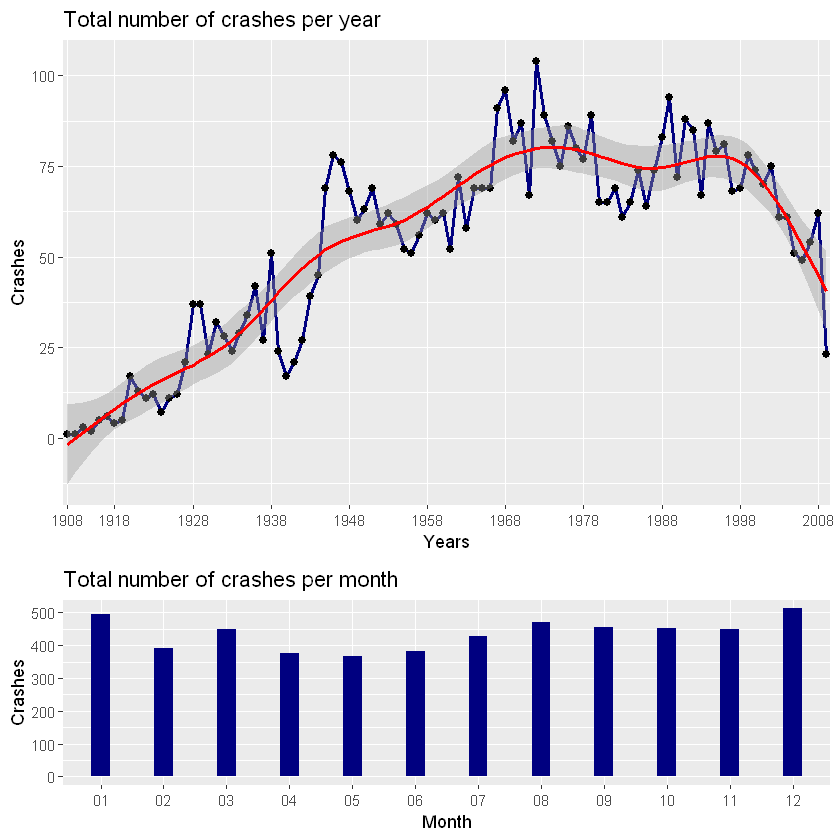

In [8]:
#Monthly
months <- as.data.frame(table(AirplaneCrashData$Month))
A2 <- ggplot(months, aes(Var1, Freq)) + 
      geom_bar(stat = "identity", fill = "Navy", width = 0.3) + 
      xlab("Month") + ylab("Crashes") +
      ggtitle("Total number of crashes per month")

#Yearly
years <- as.data.frame(table(AirplaneCrashData$Year))
A1 <- ggplot(years, aes(y = Freq, x = Var1, group = 1))  + 
      geom_line(size = 1, linetype = 1, color = "Navy") + 
      geom_point(size = 3, shape = 20)+ 
      geom_smooth(stat = 'smooth', color = 'Red', method = 'gam', formula = y ~ s(x, bs = "cs")) +
      xlab("Years") + ylab("Crashes") + 
      scale_x_discrete(breaks = seq(from = 1908, to = 2009, by = 10)) + 
      ggtitle("Total number of crashes per year")

grid.arrange(A1, A2, nrow = 2, heights=2:1)

3.2 __Casualties in Crashes__

First the casualties are grouped from the main Aircrash table grouped by the year. The total number of casualties and number of passengers aboard is calculated. This information is used to plot the percent fatalities over the year. Here we observe that the percent of fatalities is decreasing with time. This should imply that the safety measures for the people onboard must have increased.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



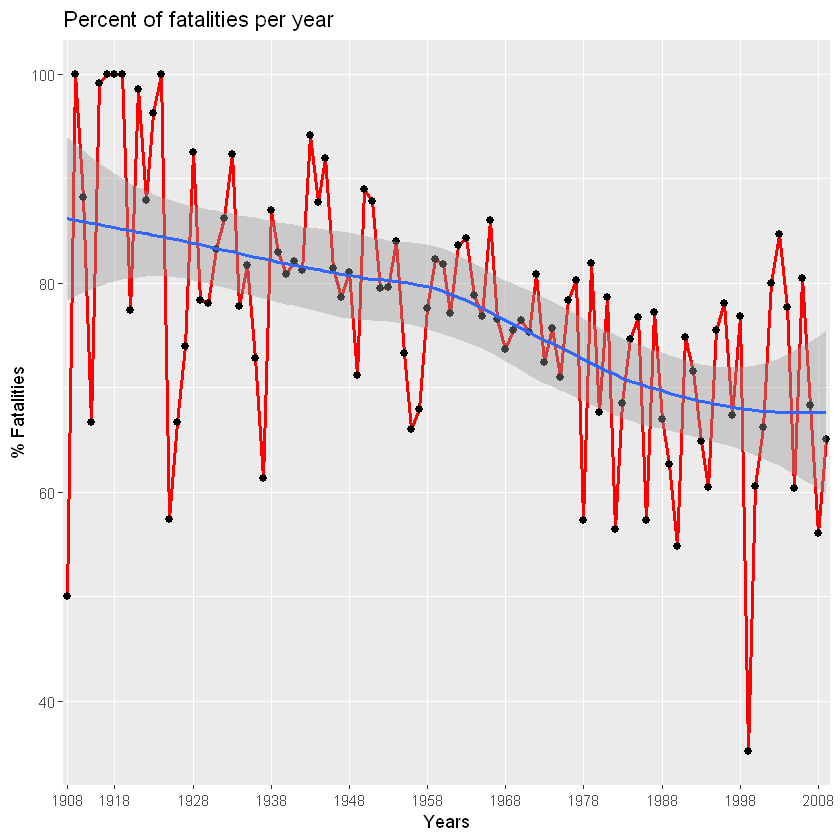

In [9]:
Fatalities <- AirplaneCrashData %>% group_by(Year) %>% 
              summarise(total_fatalities = sum(Fatalities), total_passengers = sum(Aboard))

f1 <- ggplot(Fatalities, aes(y = (total_fatalities/total_passengers)*100, x = Year, group = 10))  + 
      geom_line(size = 1, linetype = 1, color = "Red") + 
      geom_point(size = 3, shape = 20) + 
      geom_smooth() +
      xlab("Years") + ylab("% Fatalities") + 
      scale_x_discrete(breaks = seq(from = 1908, to = 2009, by = 10)) +
      ggtitle("Percent of fatalities per year")
f1

3.3 __Crash Location.__

The Location which was refined using string operations is used here. The data is grouped by the location and the total fatalities for each location is calculated. Here we plot a graph to observe the top 10 countries which encountered the aircrash. It is observed that Russia has had the maximum crashes out of all the Countries.

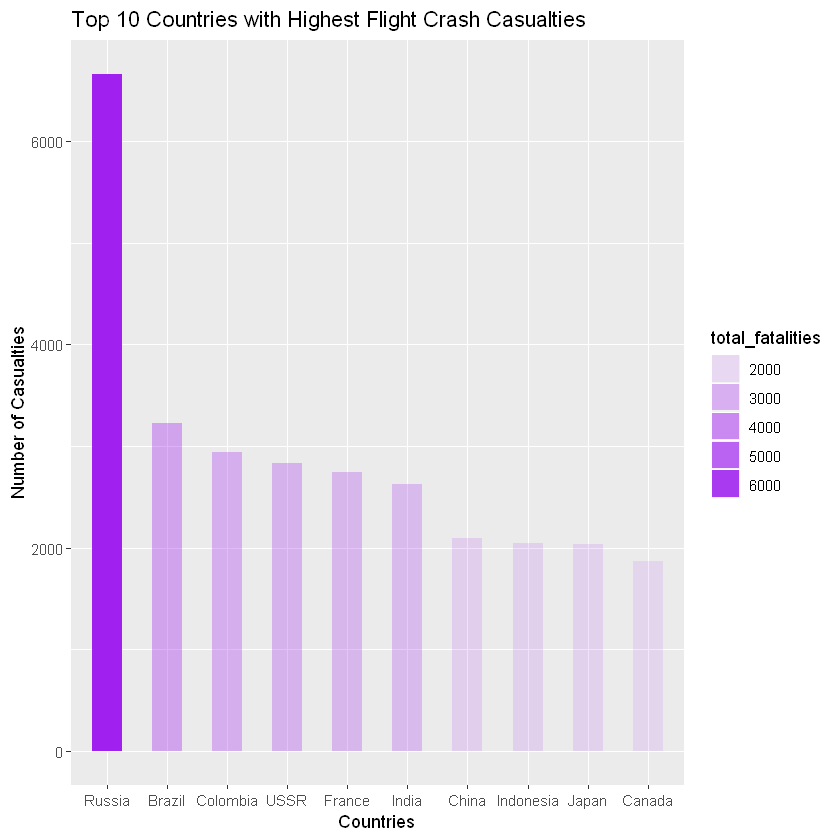

In [10]:
Location_Crash <-   AirplaneCrashData %>% group_by(Location) %>% 
                    summarise(total_fatalities = sum(Fatalities)) %>% arrange(desc(total_fatalities))

L1 <- ggplot(Location_Crash[1:10,], aes(x = reorder(Location, -total_fatalities), y = total_fatalities, alpha = total_fatalities)) + 
      geom_bar(stat = "identity", fill = "purple", width = 0.5) +
      xlab("Countries") + ylab("Number of Casualties") + 
      ggtitle("Top 10 Countries with Highest Flight Crash Casualties")
L1

3.4 __Aircraft Operators.__

To understand which Operators involved in more crashes, the data is grouped by the Operator and arranged in a descending format of the frequency. The graph has been plotted to observe the top 10 operators that caused the aircrash.

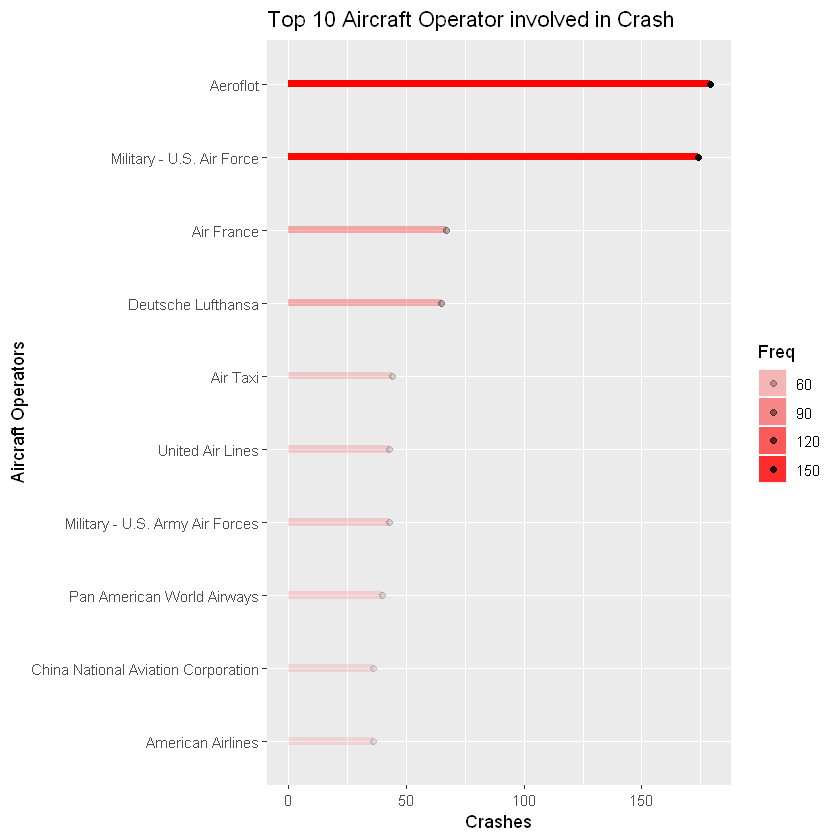

In [11]:
crash_operator <-   AirplaneCrashData %>% group_by(Operator) %>% 
                    summarise(Freq = n()) %>% arrange(desc(Freq))

operator <- ggplot(crash_operator[1:10,], aes(x = reorder(factor(Operator), Freq), y = Freq, alpha = Freq)) + 
            geom_bar(stat = "identity", fill = "red", width = 0.10) + geom_point(stat = "identity") + 
            xlab("Aircraft Operators") + ylab("Crashes") + ggtitle("Top 10 Aircraft Operator involved in Crash") + 
            coord_flip() 
operator

3.5 __Aircraft Type.__

To understand which Types have caused more crashes the data is grouped by the Type and arranged in a descending format of the frequency. The graph has been plotted to observe the top 10 types that caused the aircrash.

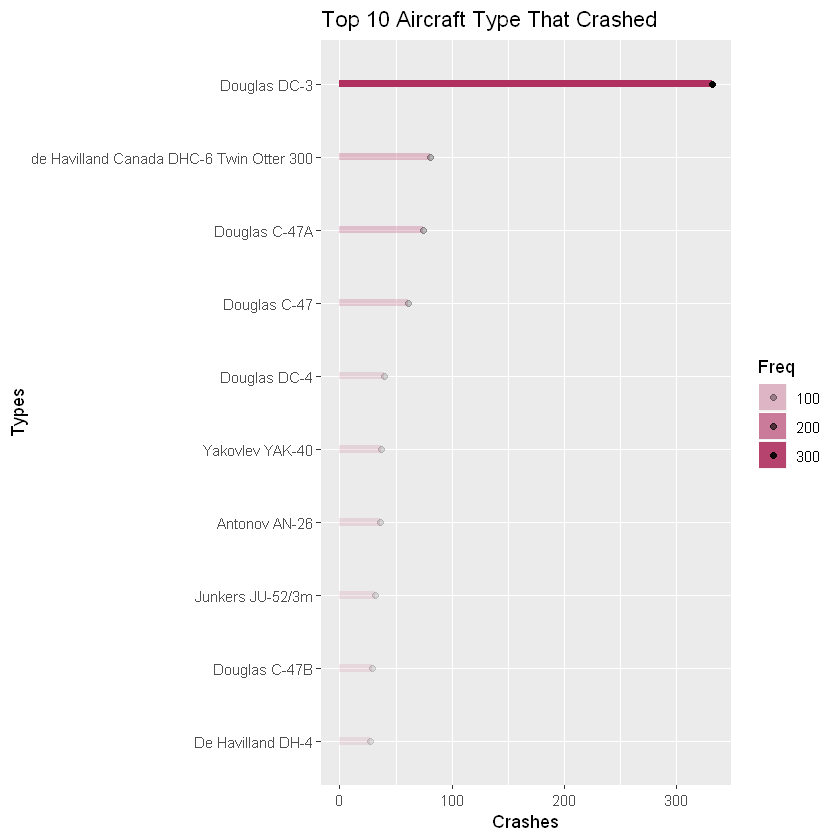

In [12]:
crash_type <- AirplaneCrashData %>% group_by(Type) %>% 
              summarise(Freq = n()) %>% arrange(desc(Freq))

type <- ggplot(crash_type[1:10,], aes(x = reorder(factor(Type), Freq), y = Freq, alpha = Freq)) + 
        geom_bar(stat = "identity", fill = "maroon", width = 0.10) + geom_point(stat = "identity") + 
        xlab("Types") + ylab("Crashes") + ggtitle("Top 10 Aircraft Type That Crashed") +
        coord_flip() 
type  



3.6 __Reason of Crash__

We apply text mining in R on the summary column to form a word cloud that states the reasons for aircrash.

In [13]:
print(tibble(AirplaneCrashData$Summary))

# A tibble: 5,236 x 1
   `AirplaneCrashData$Summary`                                                  
   <chr>                                                                        
 1 During a demonstration flight, a U.S. Army flyer flown by Orville Wright nos~
 2 First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft~
 3 The first fatal airplane accident in Canada occurred when American barnstorm~
 4 The airship flew into a thunderstorm and encountered a severe downdraft cras~
 5 Hydrogen gas which was being vented was sucked into the forward engine and i~
 6 Crashed into trees while attempting to land after being shot down by British~
 7 Exploded and burned near Neuwerk Island,  when hydrogen gas, being vented, w~
 8 Crashed near the Black Sea, cause unknown.                                   
 9 Shot down by British aircraft crashing in flames.                            
10 Shot down in flames by the British 39th Home Defence Squadron.               
# ... 

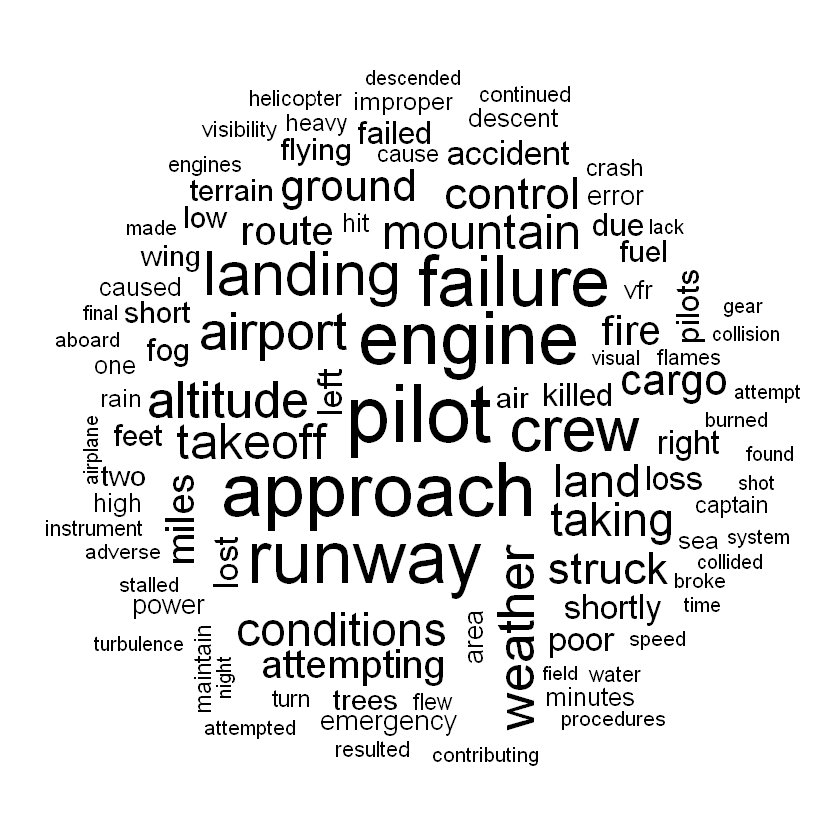

In [14]:
data <- VCorpus(VectorSource(AirplaneCrashData$Summary))

corpus_clean <- tm_map(data, tolower)
corpus_clean <- tm_map(corpus_clean, removePunctuation)
corpus_clean <- tm_map(corpus_clean, PlainTextDocument)
corpus_clean <- tm_map(corpus_clean, removeNumbers)
corpus_clean <- tm_map(corpus_clean, removeWords, stopwords())
corpus_clean <- tm_map(corpus_clean, removeWords, "flight")
corpus_clean <- tm_map(corpus_clean, removeWords, "crashed")
corpus_clean <- tm_map(corpus_clean, removeWords, "plane")
corpus_clean <- tm_map(corpus_clean, removeWords, "aircraft")


tdm <- TermDocumentMatrix(corpus_clean)
m <- as.matrix(tdm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
pal <- brewer.pal(9, "BuGn")
pal <- pal[-(1:2)]

wordcloud(corpus_clean, max.words = 100, min.freq = 30, random.order = FALSE)

In [15]:
# data <- VCorpus(VectorSource(AirplaneCrashData$Location))

# corpus_clean <- tm_map(data, tolower)
# corpus_clean <- tm_map(corpus_clean, removePunctuation)
# corpus_clean <- tm_map(corpus_clean, PlainTextDocument)
# corpus_clean <- tm_map(corpus_clean, removeNumbers)
# corpus_clean <- tm_map(corpus_clean, removeWords, stopwords())


# tdm <- TermDocumentMatrix(corpus_clean)
# m <- as.matrix(tdm)
# v <- sort(rowSums(m),decreasing=TRUE)
# d <- data.frame(word = names(v),freq=v)
# pal <- brewer.pal(9, "BuGn")
# pal <- pal[-(1:2)]

# wordcloud(corpus_clean, max.words = 100, min.freq = 30, random.order = FALSE,)

4. __Conclusion__

Answer to the question:

It is __safer to travel by air nowadays__ because:

It was observed that with time there is a decrease in the percent of incident casualties. This might imply that constructive measures have been undertaken over the years for the safety of air travel.


Takeaways from interpretation:

Russia records highest incidents of aircrashes.

As far as seasonal/timing factor, the case occurence are distributed throughout the month in generally uniform pattern. No bad days to take the flight per se.

Worst operator to fly with is Aeroflot, U.S Military recording most crashes. Douglas DC-3 is the vessel type that crashes most often.

We can understand that 3 most common causal factors related to crashes are 
- pilots, 
- engine failures, 
- approach , during take-off’s
- weather, 
- mountains
